In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [2]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

# 50 stars

## make an array of just the observational times

In [3]:
burst50=np.load('/home/lee/data/cluster_size_change/16x_burst/burst50_16x.npy')
L50=np.load('/home/lee/data/cluster_size_change/16x_burst/L50_16x.npy')
C50=np.load('/home/lee/data/cluster_size_change/16x_burst/C50_16x.npy')

In [4]:
cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
            cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

In [5]:
print(cad_L50[1,18,:])

[ 0.43044643 -2.56955357 -2.56955357  0.43044643  0.43044643  0.43044643
  0.43044643  0.43044643  0.43044643  0.43044643  0.43044643  0.43044643]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [43]:
obs_burst50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(1,12):
            if j==1:
                if cad_L50[i,k,j]-cad_L50[i,k,j-1]==3:
                    obs_burst50[i,k,j-1]=1
                elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==3:
                    if cad_L50[i,k,j]!=cad_L50[i,k,j+1]:
                        obs_burst50[i,k,j]=1
                    elif cad_L50[i,k,j]==cad_L50[i,k,j+1]:
                        obs_burst50[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L50[i,k,j-1]-cad_L50[i,k,j]==3:
                    obs_burst50[i,k,j:j+2]=1
                if cad_L50[i,k,j]-cad_L50[i,k,j-1]==3:
                    obs_burst50[i,k,j-2:j]=1

1 18
1 42
2 21
3 27
3 32
4 2
5 27
5 40
6 41
8 1
11 1
11 42
12 42
13 6
14 48
15 1
15 46
16 47
17 19
18 24
18 27
19 6
19 44
19 47
20 16
20 36
23 15
24 22
25 5
26 30
27 43
28 4
28 14
28 28
28 32
29 32
30 16
30 22
30 38
30 39
31 32
32 0
32 9
32 37
33 8
33 12
35 25
36 4
37 22
38 23
39 4
39 9
43 32
43 37
43 48
45 26
45 33
46 6
48 24
48 43


In [44]:
print(obs_burst50[1,18,:])

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## count the number of zeros and ones

In [45]:
num16_50=0
list16_50=[]
num0_50=0
list0_50=[]

for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,12):
            if obs_burst50[i,k,j]==1:
                num16_50+=1
            elif obs_burst50[i,k,j]==0:
                num0_50+=1
    list16_50.append(num16_50)
    num16_50=0
    list0_50.append(num0_50)
    num0_50=0

## convert it to mass

In [46]:
mass16_50=[]
mass0_50=[]
for i in range(run):
    mass16_50.append(list16_50[i]*16)
    mass0_50.append(list0_50[i]*1)

## find fraction

In [47]:
frac16_50=[]
frac0_50=[]
for i in range(run):
    total50=mass16_50[i]+mass0_50[i]
    frac16_50.append(100*mass16_50[i]/total50)
    frac0_50.append(100*mass0_50[i]/total50)

## plot it

/tmp/ipykernel_85491/816212220.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


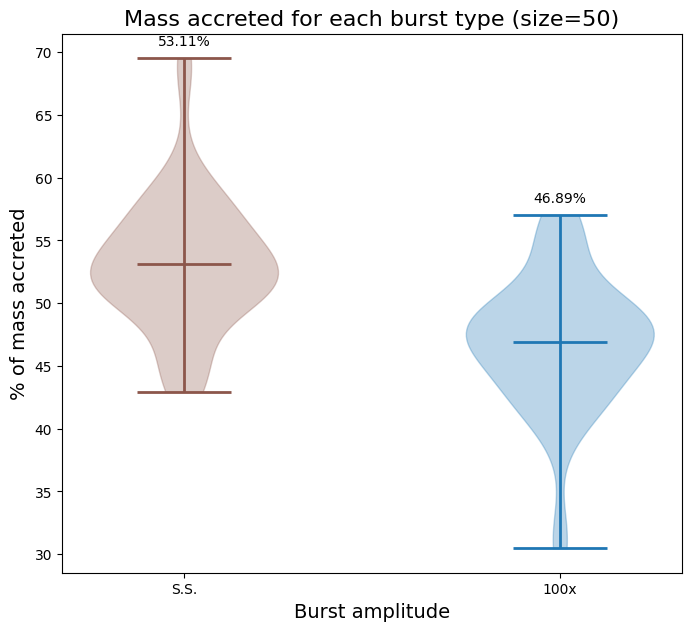

In [48]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_50,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_50))
string16='{:.2f}%'.format(np.mean(frac16_50))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_50)+1,string0,ha='center')
ax1.text(2,np.max(frac16_50)+1,string16,ha='center')
plt.title('Mass accreted for each burst type (size=50)',fontsize=16)
plt.show()    

# 100 stars

## make an array of just observational times

In [12]:
burst100=np.load('/home/lee/data/cluster_size_change/16x_burst/burst100_16x.npy')
L100=np.load('/home/lee/data/cluster_size_change/16x_burst/L100_16x.npy')
C100=np.load('/home/lee/data/cluster_size_change/16x_burst/C100_16x.npy')

In [13]:
cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
            cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [49]:
obs_burst100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for k in range(cluster_size100):
        for j in range(1,12):
            if j==1:
                if cad_L100[i,k,j]-cad_L100[i,k,j-1]==3:
                    obs_burst100[i,k,j-1]=1
                elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==3:
                    if cad_L100[i,k,j]!=cad_L100[i,k,j+1]:
                        obs_burst100[i,k,j]=1
                    elif cad_L100[i,k,j]==cad_L100[i,k,j+1]:
                        obs_burst100[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L100[i,k,j-1]-cad_L100[i,k,j]==3:
                    obs_burst100[i,k,j:j+2]=1
                if cad_L100[i,k,j]-cad_L100[i,k,j-1]==3:
                    obs_burst100[i,k,j-2:j]=1

0 18
0 19
0 28
0 35
1 5
1 18
1 26
1 47
2 16
2 35
2 65
2 90
2 97
3 16
3 96
4 66
5 46
5 62
5 73
5 85
6 22
6 35
6 45
6 59
6 73
6 78
6 86
7 11
7 83
9 3
9 15
9 65
9 70
9 91
10 2
10 7
10 57
10 85
10 90
11 17
11 83
12 59
12 90
13 57
14 12
14 42
14 47
14 93
15 38
16 80
16 86
19 19
19 28
19 40
19 89
22 45
22 48
22 53
22 88
23 17
23 64
24 1
24 13
24 28
24 29
27 31
27 79
28 2
28 58
29 40
29 56
29 60
29 78
30 37
30 61
31 14
31 71
32 58
32 77
32 89
32 99
33 14
33 27
34 64
34 83
35 89
36 52
37 85
38 4
38 29
39 12
39 67
39 87
39 88
39 94
40 10
41 13
41 64
43 36
43 40
43 62
44 4
44 28
44 41
44 95
45 22
45 44
45 78
45 84
46 0
46 15
46 86
47 3
47 18
47 45
47 85
48 89
49 33
49 63


## count the number of zeros and ones

In [50]:
num16_100=0
list16_100=[]
num0_100=0
list0_100=[]

for i in range(run):
    for k in range(cluster_size100):
        for j in range(0,12):
            if obs_burst100[i,k,j]==1:
                num16_100+=1
            elif obs_burst100[i,k,j]==0:
                num0_100+=1
    list16_100.append(num16_100)
    num16_100=0
    list0_100.append(num0_100)
    num0_100=0

## convert to mass

In [51]:
mass16_100=[]
mass0_100=[]
for i in range(run):
    mass16_100.append(list16_100[i]*16)
    mass0_100.append(list0_100[i]*1)

## find fraction

In [52]:
frac16_100=[]
frac0_100=[]
for i in range(run):
    total100=mass16_100[i]+mass0_100[i]
    frac16_100.append(100*mass16_100[i]/total100)
    frac0_100.append(100*mass0_100[i]/total100)

## plot it

/tmp/ipykernel_85491/1878982501.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


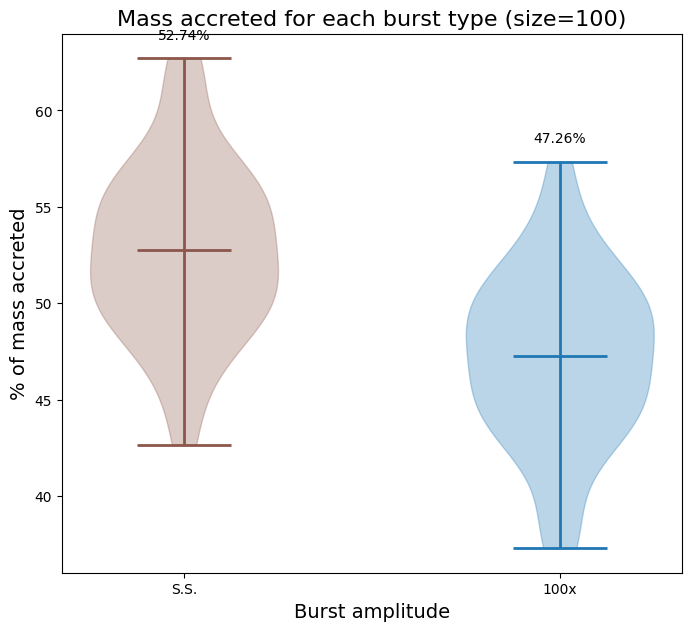

In [53]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_100,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_100))
string16='{:.2f}%'.format(np.mean(frac16_100))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_100)+1,string0,ha='center')
ax1.text(2,np.max(frac16_100)+1,string16,ha='center')
plt.title('Mass accreted for each burst type (size=100)',fontsize=16)
plt.show()    

# 500 stars

## make an array of observational times

In [54]:
burst500=np.load('/home/lee/data/cluster_size_change/16x_burst/burst500_16x.npy')
L500=np.load('/home/lee/data/cluster_size_change/16x_burst/L500_16x.npy')
C500=np.load('/home/lee/data/cluster_size_change/16x_burst/C500_16x.npy')

In [55]:
cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
            cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]

In [56]:
print(cad_L500[0,77,:])

[ 2.27877382  2.27877382  2.27877382  2.27877382  2.27877382  2.27877382
  2.27877382  2.27877382 -0.72122618 -0.72122618  2.27877382 -0.72122618]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [57]:
obs_burst500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for k in range(cluster_size500):
        for j in range(1,12):
            if j==1:
                if cad_L500[i,k,j]-cad_L500[i,k,j-1]==3:
                    obs_burst500[i,k,j-1]=1
                elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==3:
                    if cad_L500[i,k,j]!=cad_L500[i,k,j+1]:
                        obs_burst500[i,k,j]=1
                    elif cad_L500[i,k,j]==cad_L500[i,k,j+1]:
                        obs_burst500[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L500[i,k,j-1]-cad_L500[i,k,j]==3:
                    obs_burst500[i,k,j:j+2]=1
                if cad_L500[i,k,j]-cad_L500[i,k,j-1]==3:
                    obs_burst500[i,k,j-2:j]=1

0 46
0 92
0 117
0 120
0 124
0 148
0 185
0 206
0 231
0 252
0 294
0 307
0 337
0 357
0 363
0 381
0 388
0 397
0 398
0 399
0 451
0 487
1 71
1 94
1 126
1 190
1 195
1 221
1 253
1 262
1 297
1 398
1 433
1 451
2 17
2 52
2 77
2 96
2 110
2 207
2 318
2 371
2 378
2 424
2 464
3 45
3 167
3 249
3 260
3 298
3 331
3 354
3 423
3 448
3 496
4 84
4 144
4 168
4 169
4 195
4 197
4 239
4 258
4 286
4 288
4 291
4 293
4 388
4 441
4 474
5 20
5 23
5 39
5 154
5 301
5 337
5 393
5 496
6 217
6 219
6 234
6 239
6 318
6 428
6 483
6 487
7 6
7 45
7 188
7 254
7 329
7 332
7 349
7 394
7 427
7 443
7 446
8 47
8 75
8 77
8 188
8 200
8 210
8 219
8 264
8 283
8 303
8 309
8 385
8 392
8 449
8 479
9 177
9 186
9 217
9 305
9 314
9 365
9 376
9 377
9 419
9 420
9 431
9 442
9 459
9 492
10 33
10 34
10 108
10 119
10 145
10 188
10 246
10 261
10 281
10 308
10 315
10 357
10 372
10 464
11 9
11 22
11 23
11 44
11 89
11 272
11 275
11 297
11 310
11 360
11 391
11 403
11 469
12 13
12 16
12 36
12 42
12 71
12 239
12 242
12 278
12 343
12 371
12 384
12 388
12 

In [58]:
print(obs_burst500[0,77,:])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]


## count number of zeros and ones

In [59]:
num16_500=0
list16_500=[]
num0_500=0
list0_500=[]

for i in range(run):
    for k in range(cluster_size500):
        for j in range(0,12):
            if obs_burst500[i,k,j]==1:
                num16_500+=1
            elif obs_burst500[i,k,j]==0:
                num0_500+=1
    list16_500.append(num16_500)
    num16_500=0
    list0_500.append(num0_500)
    num0_500=0

## convert to mass

In [60]:
mass16_500=[]
mass0_500=[]
for i in range(run):
    mass16_500.append(list16_500[i]*16)
    mass0_500.append(list0_500[i]*1)

## find fraction

In [61]:
frac16_500=[]
frac0_500=[]
for i in range(run):
    total500=mass16_500[i]+mass0_500[i]
    frac16_500.append(100*mass16_500[i]/total500)
    frac0_500.append(100*mass0_500[i]/total500)

## plot it

/tmp/ipykernel_85491/1119617401.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


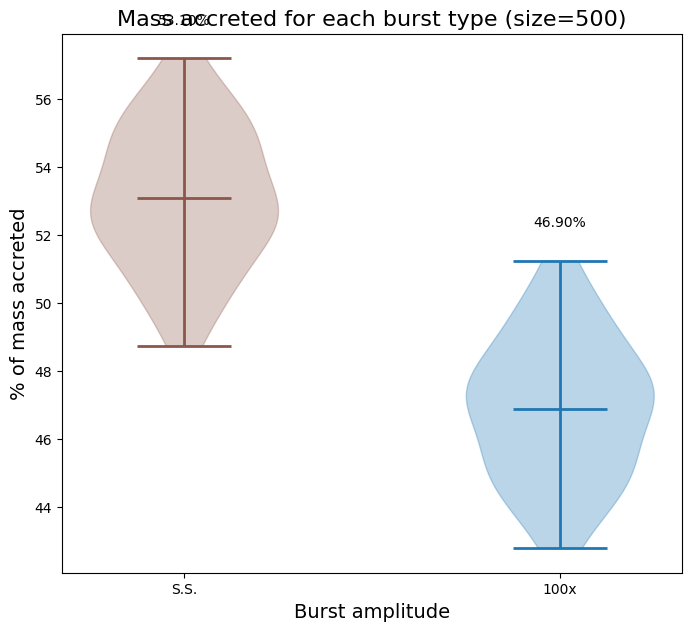

In [62]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_500,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_500,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_500))
string16='{:.2f}%'.format(np.mean(frac16_500))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_500)+1,string0,ha='center')
ax1.text(2,np.max(frac16_500)+1,string16,ha='center')
plt.title('Mass accreted for each burst type (size=500)',fontsize=16)
plt.show()  

# 1000 stars

## make an array of observational times

In [28]:
burst1000=np.load('/home/lee/data/cluster_size_change/16x_burst/burst1000_16x.npy')
L1000=np.load('/home/lee/data/cluster_size_change/16x_burst/L1000_16x.npy')
C1000=np.load('/home/lee/data/cluster_size_change/16x_burst/C1000_16x.npy')

In [29]:
cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
            cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

In [30]:
print(cad_L1000[0,128,:])

[-0.70156622  2.29843378  2.29843378 -0.70156622 -0.70156622  2.29843378
  2.29843378  2.29843378  2.29843378  2.29843378  2.29843378  2.29843378]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [32]:
obs_burst1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(1,12):
            if j==1:
                if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==3:
                    obs_burst1000[i,k,j-1]=1
                elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==3:
                    if cad_L1000[i,k,j]!=cad_L1000[i,k,j+1]:
                        obs_burst1000[i,k,j]=1
                    elif cad_L1000[i,k,j]==cad_L1000[i,k,j+1]:
                        obs_burst1000[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==3:
                    obs_burst1000[i,k,j:j+2]=1
                if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==3:
                    obs_burst1000[i,k,j-2:j]=1

0 8
0 25
0 64
0 144
0 164
0 223
0 248
0 358
0 453
0 479
0 490
0 542
0 559
0 659
0 688
0 746
0 818
0 822
0 883
0 893
0 898
0 911
0 929
0 943
1 16
1 49
1 106
1 131
1 151
1 160
1 216
1 336
1 345
1 374
1 397
1 402
1 405
1 412
1 436
1 441
1 464
1 501
1 521
1 540
1 546
1 548
1 711
1 720
1 737
1 786
1 818
1 827
1 948
1 972
2 11
2 14
2 78
2 107
2 237
2 328
2 356
2 398
2 420
2 460
2 477
2 572
2 706
2 742
2 840
2 889
2 960
2 992
3 5
3 40
3 62
3 84
3 99
3 111
3 177
3 252
3 287
3 373
3 376
3 414
3 475
3 501
3 542
3 554
3 683
3 715
3 736
3 817
3 863
3 906
3 950
3 960
4 55
4 57
4 62
4 69
4 171
4 198
4 241
4 330
4 341
4 375
4 376
4 396
4 406
4 430
4 480
4 523
4 597
4 619
4 728
4 741
4 780
4 789
4 827
4 858
4 864
4 883
4 898
4 899
4 935
4 983
5 44
5 71
5 100
5 132
5 207
5 265
5 311
5 333
5 347
5 416
5 640
5 715
5 734
5 783
5 784
5 788
5 796
5 820
5 828
5 865
5 914
6 1
6 16
6 40
6 150
6 179
6 198
6 211
6 241
6 351
6 398
6 408
6 452
6 469
6 471
6 547
6 578
6 581
6 716
6 722
6 773
6 822
6 855
6 864
6 916

## count number of zeros and ones

In [33]:
num16_1000=0
list16_1000=[]
num0_1000=0
list0_1000=[]

for i in range(run):
    for k in range(cluster_size1000):
        for j in range(0,12):
            if obs_burst1000[i,k,j]==1:
                num16_1000+=1
            elif obs_burst1000[i,k,j]==0:
                num0_1000+=1
    list16_1000.append(num16_1000)
    num16_1000=0
    list0_1000.append(num0_1000)
    num0_1000=0

## convert to mass

In [34]:
mass16_1000=[]
mass0_1000=[]
for i in range(run):
    mass16_1000.append(list16_1000[i]*16)
    mass0_1000.append(list0_1000[i]*1)

## find fraction

In [35]:
frac16_1000=[]
frac0_1000=[]
for i in range(run):
    total1000=mass16_1000[i]+mass0_1000[i]
    frac16_1000.append(100*mass16_1000[i]/total1000)
    frac0_1000.append(100*mass0_1000[i]/total1000)

## plot it

/tmp/ipykernel_85491/622289017.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


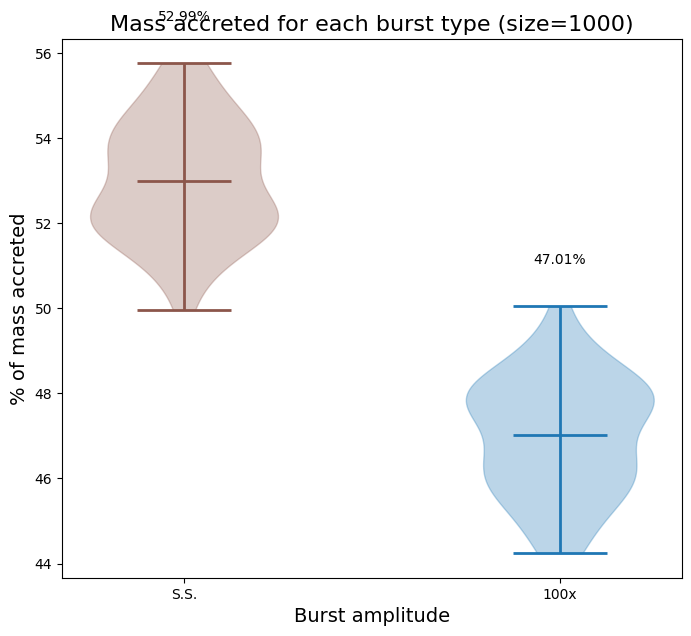

In [36]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_1000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_1000))
string16='{:.2f}%'.format(np.mean(frac16_1000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_1000)+1,string0,ha='center')
ax1.text(2,np.max(frac16_1000)+1,string16,ha='center')
plt.title('Mass accreted for each burst type (size=1000)',fontsize=16)
plt.show()    

# 2000 stars

## make an array of observational times

In [63]:
burst2000=np.load('/home/lee/data/cluster_size_change/16x_burst/burst2000_16x.npy')
L2000=np.load('/home/lee/data/cluster_size_change/16x_burst/L2000_16x.npy')
C2000=np.load('/home/lee/data/cluster_size_change/16x_burst/C2000_16x.npy')

In [64]:
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [65]:
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    obs_burst2000[i,k,j:j+2]=1
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-2:j]=1

0 15
0 55
0 60
0 63
0 65
0 155
0 195
0 196
0 222
0 236
0 272
0 276
0 295
0 325
0 365
0 437
0 457
0 495
0 637
0 654
0 714
0 721
0 768
0 770
0 847
0 881
0 968
0 1022
0 1043
0 1113
0 1153
0 1172
0 1182
0 1188
0 1196
0 1236
0 1245
0 1272
0 1276
0 1309
0 1312
0 1315
0 1328
0 1359
0 1419
0 1441
0 1457
0 1486
0 1550
0 1575
0 1578
0 1703
0 1888
0 1904
0 1983
1 38
1 118
1 158
1 254
1 282
1 287
1 338
1 443
1 452
1 545
1 637
1 638
1 640
1 665
1 691
1 712
1 797
1 805
1 815
1 901
1 986
1 998
1 1108
1 1185
1 1217
1 1219
1 1253
1 1261
1 1264
1 1400
1 1406
1 1433
1 1491
1 1545
1 1583
1 1584
1 1585
1 1612
1 1627
1 1668
1 1683
1 1718
1 1738
1 1822
1 1843
1 1888
1 1955
1 1964
2 13
2 14
2 65
2 131
2 269
2 335
2 337
2 361
2 388
2 451
2 461
2 512
2 562
2 606
2 626
2 704
2 706
2 771
2 835
2 854
2 879
2 882
2 899
2 972
2 1033
2 1097
2 1118
2 1162
2 1174
2 1176
2 1178
2 1185
2 1189
2 1337
2 1357
2 1493
2 1533
2 1632
2 1732
2 1737
2 1770
2 1774
2 1822
2 1855
2 1863
2 1888
2 1895
2 1956
3 1
3 83
3 101
3 132
3 14

## count number of zeros and ones

In [66]:
num16_2000=0
list16_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num16_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list16_2000.append(num16_2000)
    num16_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

## convert to mass

In [67]:
mass16_2000=[]
mass0_2000=[]
for i in range(run):
    mass16_2000.append(list16_2000[i]*16)
    mass0_2000.append(list0_2000[i]*1)

## find fraction

In [68]:
frac16_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass16_2000[i]+mass0_2000[i]
    frac16_2000.append(100*mass16_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

## plot it

/tmp/ipykernel_85491/3764601389.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


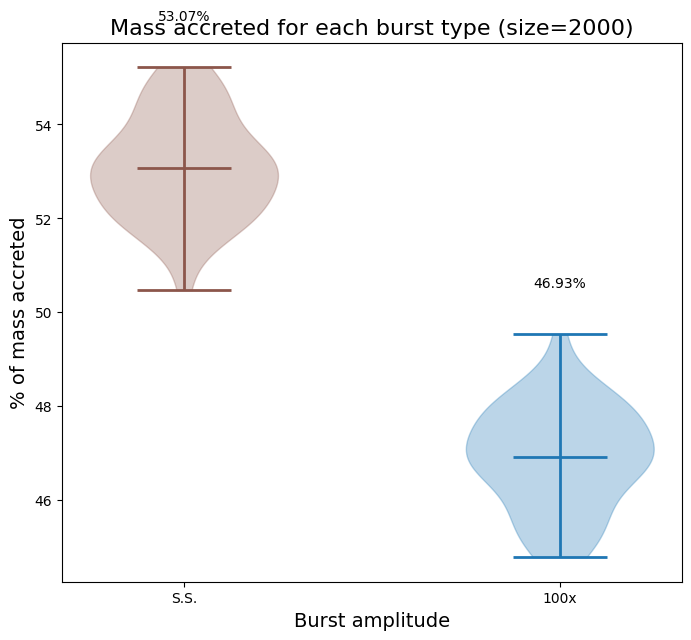

In [69]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_2000))
string16='{:.2f}%'.format(np.mean(frac16_2000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_2000)+1,string0,ha='center')
ax1.text(2,np.max(frac16_2000)+1,string16,ha='center')
plt.title('Mass accreted for each burst type (size=2000)',fontsize=16)
plt.show()    

# 5000 stars

## make an array of observational times

In [70]:
burst5000=np.load('/home/lee/data/cluster_size_change/16x_burst/burst5000_16x.npy')
L5000=np.load('/home/lee/data/cluster_size_change/16x_burst/L5000_16x.npy')
C5000=np.load('/home/lee/data/cluster_size_change/16x_burst/C5000_16x.npy')

In [71]:
cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
            cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [72]:
obs_burst5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(1,12):
            if j==1:
                if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==3:
                    obs_burst5000[i,k,j-1]=1
                elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==3:
                    if cad_L5000[i,k,j]!=cad_L5000[i,k,j+1]:
                        obs_burst5000[i,k,j]=1
                    elif cad_L5000[i,k,j]==cad_L5000[i,k,j+1]:
                        obs_burst5000[i,k,j:j+2]=1
                        print(i,k)
            else:
                if cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==3:
                    obs_burst5000[i,k,j:j+2]=1
                if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==3:
                    obs_burst5000[i,k,j-2:j]=1

0 22
0 71
0 113
0 255
0 351
0 400
0 472
0 552
0 602
0 610
0 654
0 669
0 808
0 843
0 858
0 948
0 980
0 1018
0 1031
0 1315
0 1326
0 1385
0 1453
0 1486
0 1595
0 1630
0 1648
0 1745
0 1773
0 1823
0 1825
0 1841
0 1854
0 1887
0 1932
0 1973
0 2062
0 2063
0 2158
0 2177
0 2247
0 2251
0 2252
0 2276
0 2338
0 2364
0 2469
0 2534
0 2592
0 2679
0 2682
0 2705
0 2757
0 2803
0 2901
0 2906
0 2943
0 2980
0 3030
0 3047
0 3084
0 3235
0 3256
0 3277
0 3290
0 3291
0 3315
0 3322
0 3407
0 3433
0 3444
0 3533
0 3582
0 3583
0 3640
0 3813
0 3848
0 3882
0 3890
0 3902
0 3955
0 4152
0 4175
0 4226
0 4275
0 4312
0 4383
0 4386
0 4398
0 4415
0 4449
0 4495
0 4625
0 4630
0 4677
0 4707
0 4719
0 4750
0 4769
0 4799
0 4860
0 4869
0 4924
0 4936
0 4968
1 43
1 86
1 92
1 121
1 129
1 133
1 135
1 137
1 169
1 211
1 220
1 249
1 250
1 258
1 381
1 427
1 449
1 451
1 480
1 525
1 543
1 574
1 612
1 643
1 784
1 801
1 807
1 821
1 854
1 869
1 871
1 930
1 1054
1 1084
1 1110
1 1307
1 1374
1 1425
1 1434
1 1440
1 1598
1 1614
1 1647
1 1689
1 1696
1 17

## count number of zeros and ones

In [73]:
num16_5000=0
list16_5000=[]
num0_5000=0
list0_5000=[]

for i in range(run):
    for k in range(cluster_size5000):
        for j in range(0,12):
            if obs_burst5000[i,k,j]==1:
                num16_5000+=1
            elif obs_burst5000[i,k,j]==0:
                num0_5000+=1
    list16_5000.append(num16_5000)
    num16_5000=0
    list0_5000.append(num0_5000)
    num0_5000=0

## convert to mass

In [74]:
mass16_5000=[]
mass0_5000=[]
for i in range(run):
    mass16_5000.append(list16_5000[i]*16)
    mass0_5000.append(list0_5000[i]*1)

## find fraction

In [75]:
frac16_5000=[]
frac0_5000=[]
for i in range(run):
    total5000=mass16_5000[i]+mass0_5000[i]
    frac16_5000.append(100*mass16_5000[i]/total5000)
    frac0_5000.append(100*mass0_5000[i]/total5000)

## plot it

/tmp/ipykernel_85491/127925467.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


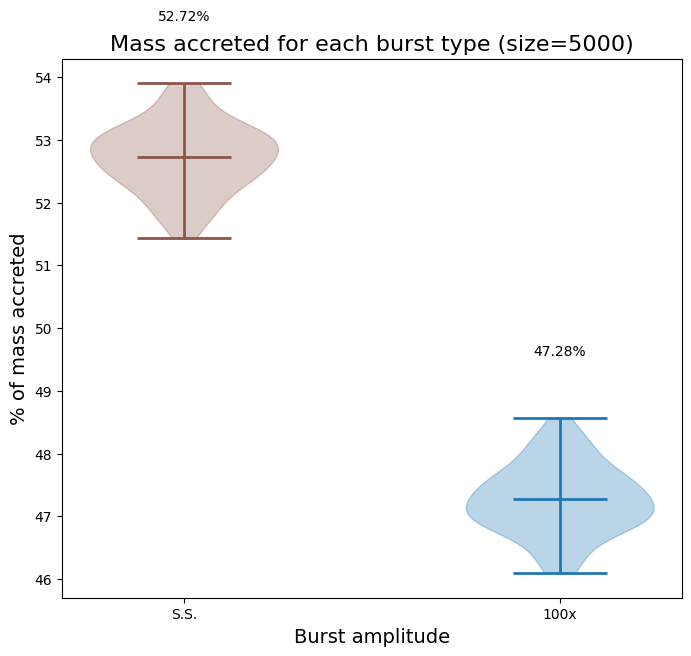

In [76]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_5000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_5000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_5000))
string16='{:.2f}%'.format(np.mean(frac16_5000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_5000)+1,string0,ha='center')
ax1.text(2,np.max(frac16_5000)+1,string16,ha='center')
plt.title('Mass accreted for each burst type (size=5000)',fontsize=16)
plt.show()    

In [78]:
#means and std
mean50=np.mean(frac16_50)
std50=np.std(frac16_50)
mean100=np.mean(frac16_100)
std100=np.std(frac16_100)
mean500=np.mean(frac16_500)
std500=np.std(frac16_500)
mean1000=np.mean(frac16_1000)
std1000=np.std(frac16_1000)
mean2000=np.mean(frac16_2000)
std2000=np.std(frac16_2000)
mean5000=np.mean(frac16_5000)
std5000=np.std(frac16_5000)

/tmp/ipykernel_85491/3635495890.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


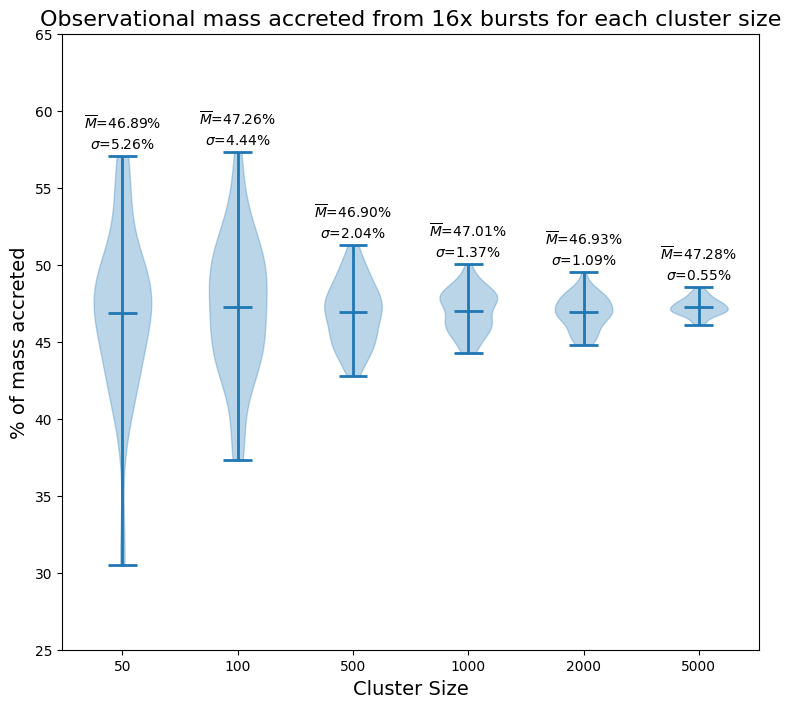

In [82]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac16_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac16_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac16_500,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac16_1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac16_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac16_5000,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)
    
string50mean='{:.2f}%'.format(mean50)
string50std='{:.2f}%'.format(std50)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)
string500mean='{:.2f}%'.format(mean500)
string500std='{:.2f}%'.format(std500)
string1000mean='{:.2f}%'.format(mean1000)
string1000std='{:.2f}%'.format(std1000)
string2000mean='{:.2f}%'.format(mean2000)
string2000std='{:.2f}%'.format(std2000)
string5000mean='{:.2f}%'.format(mean5000)
string5000std='{:.2f}%'.format(std5000)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(25,65)
ax1.text(1,np.max(frac16_50)+1.75,'$\overline{M}$='+string50mean,ha='center')
ax1.text(1,np.max(frac16_50)+0.5,'$\sigma$='+string50std,ha='center')
ax1.text(2,np.max(frac16_100)+1.75,'$\overline{M}$='+string100mean,ha='center')
ax1.text(2,np.max(frac16_100)+0.5,'$\sigma$='+string100std,ha='center')
ax1.text(3,np.max(frac16_500)+1.75,'$\overline{M}$='+string500mean,ha='center')
ax1.text(3,np.max(frac16_500)+0.5,'$\sigma$='+string500std,ha='center')
ax1.text(4,np.max(frac16_1000)+1.75,'$\overline{M}$='+string1000mean,ha='center')
ax1.text(4,np.max(frac16_1000)+0.5,'$\sigma$='+string1000std,ha='center')
ax1.text(5,np.max(frac16_2000)+1.75,'$\overline{M}$='+string2000mean,ha='center')
ax1.text(5,np.max(frac16_2000)+0.5,'$\sigma$='+string2000std,ha='center')
ax1.text(6,np.max(frac16_5000)+1.75,'$\overline{M}$='+string5000mean,ha='center')
ax1.text(6,np.max(frac16_5000)+0.5,'$\sigma$='+string5000std,ha='center')


plt.title('Observational mass accreted from 16x bursts for each cluster size',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot16x.jpeg',dpi=300,bbox_inches='tight')
plt.show()  

In [106]:
print('max=',np.max(frac16_2000))
print('min=',np.min(frac16_2000))
print('mean=',np.mean(frac16_2000))
error2000up=(np.max(frac16_2000)-np.mean(frac16_2000))/((np.max(frac16_2000)+np.mean(frac16_2000))/2)
error2000down=(np.mean(frac16_2000)-np.min(frac16_2000))/((np.min(frac16_2000)+np.mean(frac16_2000))/2)
print(error2000up)
print(error2000down)
avg2000=(error2000up+error2000down)/2
print(avg2000*100)

max= 47.53060753060753
min= 42.626641651031896
mean= 44.820940198512425
0.05868157922037089
0.050185459702153275
5.443351946126208


In [107]:
print('max=',np.max(frac16_1000))
print('min=',np.min(frac16_1000))
print('mean=',np.mean(frac16_1000))
print(np.max(frac16_1000)/np.mean(frac16_1000))
error1000up=(np.max(frac16_1000)-np.mean(frac16_1000))/((np.max(frac16_1000)+np.mean(frac16_1000))/2)
print(error1000up)
error1000down=(np.mean(frac16_1000)-np.min(frac16_1000))/((np.min(frac16_1000)+np.mean(frac16_1000))/2)
print(error1000down)
avg1000=(error1000up+error1000down)/2
print(avg1000*100)

max= 48.25918320784851
min= 41.92210419828022
mean= 44.94776744534569
1.0736725303771615
0.07105512495144237
0.06965966887755785
7.0357396914500105
